In [1]:
!pip install jsonlines

In [2]:
# mount drive to access data

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# load data

DIR = "/content/gdrive/MyDrive/CUNY_Comp_Ling/advanced_nlp/term_project/data/"
TRAIN = 'train.jsonl'
DEV = 'dev.jsonl'
TEST = 'test.jsonl'


In [24]:
import jsonlines
import nltk
import time

nltk.download('punkt')

def number_of_tokens(text: str) -> int:
  toks = nltk.word_tokenize(text)
  return len(toks)

abstracts_toks = []
abstracts_chars = []
texts_toks = []
texts_chars = []
count = 0
start_time = time.process_time()
sets = [TRAIN, DEV, TEST] 

for set_path in sets:
  with jsonlines.open(DIR + set_path) as f:
      for line in f.iter():
        abstract = line['abstract']
        text = line['text']
        abstracts_toks.append(number_of_tokens(abstract))
        abstracts_chars.append(len(abstract))
        texts_toks.append(number_of_tokens(text))
        texts_chars.append(len(text))
        if not count % 1000:
          print(f"processed {count} texts in {time.process_time() - start_time}")
          start_time = time.process_time()
        count += 1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
processed 0 texts in 0.016861317999996572
processed 1000 texts in 21.974999742000023
processed 2000 texts in 22.00688870600004
processed 3000 texts in 22.003733022000006
processed 4000 texts in 21.77915573200005
processed 5000 texts in 22.078954478000014
processed 6000 texts in 22.050495702000035
processed 7000 texts in 21.810803265999994
processed 8000 texts in 22.2603250169999
processed 9000 texts in 21.813877260000027
processed 10000 texts in 22.028761928999984
processed 11000 texts in 22.02022947599994
processed 12000 texts in 21.84119427799999
processed 13000 texts in 22.60049411300008
processed 14000 texts in 22.011282854
processed 15000 texts in 22.194473650999953
processed 16000 texts in 21.970100720999994
processed 17000 texts in 22.19906244599997
processed 18000 texts in 22.43415929999992
processed 19000 texts in 22.061677869000164
processed 20000 texts in 22.0976469

In [30]:
import numpy as np
import pandas as pd

df = pd.DataFrame(columns=['metric', 'tokens', 'characters'])

average_abstract_toks = np.mean(np.array(abstracts_toks))
average_abstract_chars = np.mean(np.array(abstracts_chars))
average_text_toks = np.mean(np.array(texts_toks))
average_text_chars = np.mean(np.array(texts_chars))

print(f"Total number of papers: {count}")
print(f"Average abstract length: {round(average_abstract_toks)} tokens, {round(average_abstract_chars)} characters")
print(f"Max abstract length: {round(np.max(np.array(abstracts_toks)))} tokens, {round(np.max(np.array(abstracts_chars)))} characters")
print(f"Min abstract length: {round(np.min(np.array(abstracts_toks)))} tokens, {round(np.min(np.array(abstracts_chars)))} characters")
print(f"Average paper text length: {round(average_text_toks)} tokens, {round(average_text_chars)} characters")
print(f"Max paper text length: {round(np.max(np.array(texts_toks)))} tokens, {round(np.max(np.array(texts_chars)))} characters")
print(f"Min paper text length: {round(np.min(np.array(texts_toks)))} tokens, {round(np.min(np.array(texts_chars)))} characters")

diff = [t - a for a, t in zip(abstracts_toks, texts_toks)]
print(f"Average difference in length: {round(np.mean(diff))} tokens")
print(f"Min  difference in length: {round(np.min(diff))} tokens")

Total number of papers: 24225
Average abstract length: 157 tokens, 995 characters
Max abstract length: 760 tokens, 4431 characters
Min abstract length: 50 tokens, 108 characters
Average paper text length: 3433 tokens, 20703 characters
Max paper text length: 4202 tokens, 34497 characters
Min paper text length: 997 tokens, 5315 characters
Average difference in length: 3276 tokens
Min  difference in length: 576 tokens


In [ ]:
"""
Total number of papers: 24225
Average abstract length: 157 tokens, 995 characters
Max abstract length: 760 tokens, 4431 characters
Min abstract length: 50 tokens, 108 characters
Average paper text length: 3433 tokens, 20703 characters
Max paper text length: 4202 tokens, 34497 characters
Min paper text length: 997 tokens, 5315 characters
Average difference in length: 3276 tokens
Min  difference in length: 576 tokens
"""


95.0 confidence interval 3421 and 3444


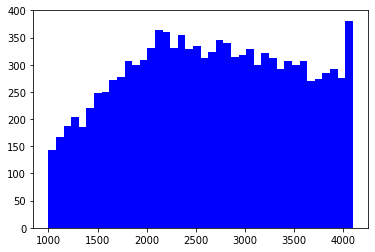

In [26]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st


plt.hist(texts_toks, bins=40, color='blue', range=(1000,4100))
# confidence intervals
alpha=0.95
text_ci = st.norm.interval(alpha=0.95, loc=np.mean(texts_toks), scale=st.sem(texts_toks))
print(f"\n{alpha*100} confidence interval {round(text_ci[0])} and {round(text_ci[1])}")



95.0 confidence interval 156 and 158


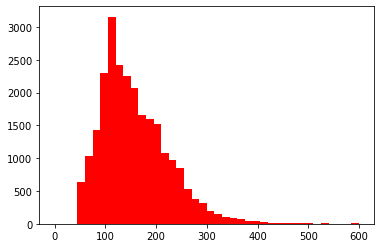

In [27]:
import numpy 
plt.hist(abstracts_toks, bins=40,color='red', range=(0,600))
# confidence intervals
alpha=0.95
abs_ci = st.norm.interval(alpha=0.95, loc=np.mean(abstracts_toks), scale=st.sem(abstracts_toks))
print(f"\n{alpha*100} confidence interval {round(abs_ci[0])} and {round(abs_ci[1])}")

In [28]:
# count papers for which abstracts are 300 toks or less and texts are over 1000 toks
count = 0
for abstract, text in zip(abstracts_toks, texts_toks):
  if abstract <= 300 and text >= 1000:
    count += 1
print(f"{count} papers with abstracts of 300 tokens or less and texts 1000 tokens or more")

24225 papers with abstracts of 300 tokens or less and texts 1000 tokens or more


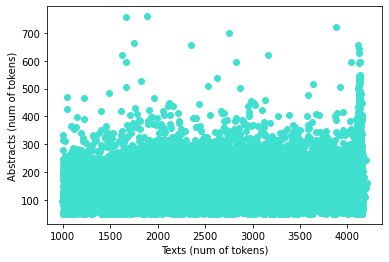

In [29]:
# plot texts and abstracts distribution 
plt.xlabel('Texts (num of tokens)', fontsize=10)
plt.ylabel('Abstracts (num of tokens)', fontsize=10)
plt.scatter(texts_toks, abstracts_toks, c='turquoise')
plt.show()